In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Load dataset
df = pd.read_csv("House_Price.csv")

In [26]:
# Select relevant features
features = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Garage"]
target = "Price"

In [27]:
df = df[features + [target]]

In [28]:
# Convert categorical Garage feature to numerical
df["Garage"] = df["Garage"].map({"Yes": 1, "No": 0})

In [29]:
# Handle missing values
df = df.dropna()

In [30]:
# Split dataset into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Make predictions
y_pred = rf.predict(X_test)

In [33]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 252183.517725


In [35]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 85225770963.79097


In [36]:
print(f"R2 Score: {r2}")

R2 Score: -0.09546342258857976


In [37]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": features, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

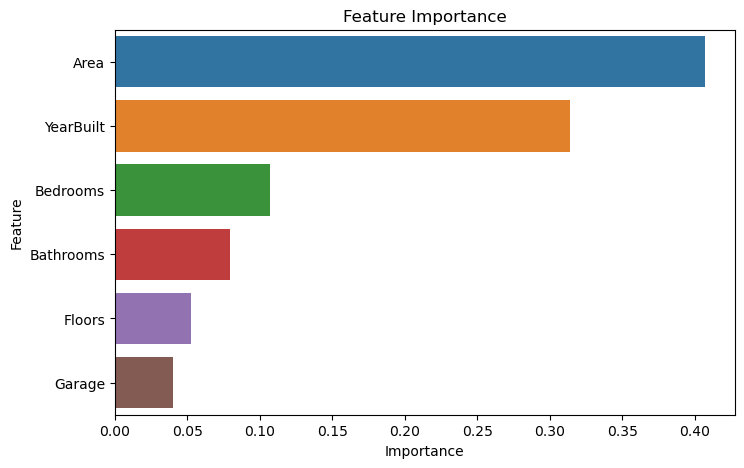

In [38]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"])
plt.title("Feature Importance")
plt.show()

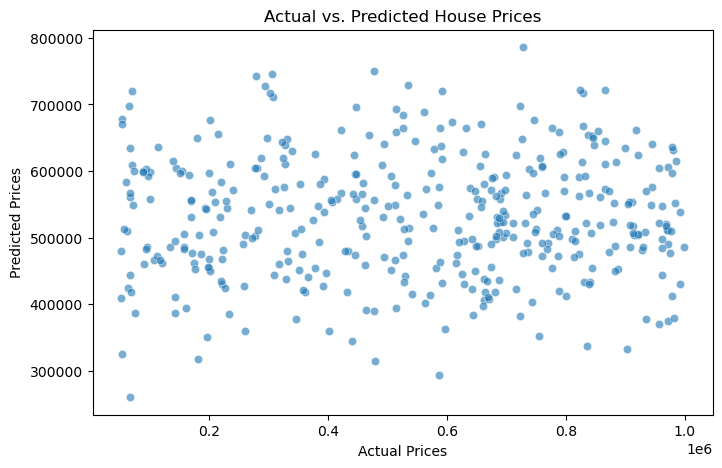

In [39]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()